<a href="https://colab.research.google.com/github/ArushiG11/Data-Science-Job-Analysis/blob/main/Data_Science_Job_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings

<module 'warnings' from '/usr/lib/python3.10/warnings.py'>

In [2]:
plt.style.use('dark_background')

# Loading the Dataset

In [3]:
url = 'https://raw.githubusercontent.com/ArushiG11/Data-Science-Job-Analysis/main/data_science_job.csv'
df = pd.read_csv(url)
df.head()  # Display the first few rows

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [4]:
df.shape

(5000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


# Dropping for missing values

In [6]:
df = df.dropna() # Drop the null values

In [7]:
df.isnull().sum().sum()  # To get total null values

0

# Exploratory Data Analysis (EDA)

In [8]:
df.nunique()

,0
work_year,3
job_title,15
job_category,4
salary_currency,5
salary,4447
salary_in_usd,4442
employee_residence,7
experience_level,4
employment_type,4
work_setting,3


In [9]:
df.experience_level.unique() # When evaluating columns, it might be appropriate to look at values this way.

array(['MI', 'EX', 'SE', 'EN'], dtype=object)

In [10]:
df.work_year.value_counts()

,count
work_year,
2020,1559
2022,1481
2021,1460


In [11]:
df.job_category.unique()

array(['Analysis', 'ML/AI', 'Data Science', 'Engineering'], dtype=object)

In [12]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4993,False
4994,False
4997,False
4998,False


In [13]:
# Displaying summary statistics for numerical columns
df.describe(include='object').T

,count,unique,top,freq
job_title,4500,15,Data Engineer in office,342
job_category,4500,4,Data Science,1173
salary_currency,4500,5,EUR,962
employee_residence,4500,7,JP,697
experience_level,4500,4,SE,1154
employment_type,4500,4,FL,1147
work_setting,4500,3,Hybrid,1562
company_location,4500,7,UK,728
company_size,4500,3,S,1519


In [14]:
df.describe()

,work_year,salary,salary_in_usd
count,4500.000000,4500.000000,4500.000000
mean,2020.982667,113759.449111,113756.052444
std,0.821830,48947.972699,49154.409212
min,2020.000000,30018.000000,30016.000000
25%,2020.000000,71473.000000,70991.500000
50%,2021.000000,114471.500000,113521.500000
75%,2022.000000,155187.250000,156294.750000
max,2022.000000,199924.000000,199985.000000


In [15]:
df = df.drop_duplicates().reset_index(drop=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [18]:
modes = df.mode().iloc[0]
modes

,0
work_year,2020.0
job_title,Data Engineer in office
job_category,Data Science
salary_currency,EUR
salary,30637.0
salary_in_usd,31634
employee_residence,JP
experience_level,SE
employment_type,FL
work_setting,Hybrid


In [19]:
df.job_title.value_counts()

,count
job_title,
Data Engineer in office,342
Data Engineer,323
Data Scientist,315
Data Analyst in office,313
Statistician,312
Data Analyst (Remote),303
Data Engineer (Remote),300
Statistician (Remote),295
Data Scientist in office,293


In [20]:
def map_job_title(df, original_column='job_title', new_column='job_category'):
    # Define the mapping dictionary
    job_title_mapping = {
        'data engineer': 'Data Engineer',
        'data engineer in office': 'Data Engineer',
        'data engineer(remote)': 'Data Engineer',
        'data analyst': 'Data Analyst',
        'data analyst in office': 'Data Analyst',
        'data analyst(remote)': 'Data Analyst',
        'data scientist': 'Data Scientist',
        'data scientist in office': 'Data Scientist',
        'data scientist(remote)': 'Data Scientist',
        'machine learning engineer': 'ML Engineer',
        'machine learning engineer in office': 'ML Engineer',
        'machine learning engineer(remote)': 'ML Engineer',
        'statistician': 'Statistician',
        'statistician in office': 'Statistician',
        'statistician(remote)': 'Statistician'
    }

    # Convert job titles to lowercase and map them to broader categories
    df[new_column] = df[original_column].str.lower().apply(
        lambda title: next((v for k, v in job_title_mapping.items() if k in title), 'Other')
    )
    return df

# Example usage
df = map_job_title(df)

In [21]:
df.job_category.value_counts()

,count
job_category,
Data Engineer,965
Data Analyst,898
Statistician,896
Data Scientist,892
ML Engineer,849


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4500 non-null   int64 
 1   job_title           4500 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              4500 non-null   int64 
 5   salary_in_usd       4500 non-null   int64 
 6   employee_residence  4500 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     4500 non-null   object
 9   work_setting        4500 non-null   object
 10  company_location    4500 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 422.0+ KB


In [23]:
# "2. Removing Unnecessary Whitespaces:
# Some text entries may have unnecessary spaces at the beginning or end. Let's clean these up."

df['employment_type'] = df['employment_type'].str.strip()
df['experience_level'] = df['experience_level'].str.strip()
df['job_title'] = df['job_title'].str.strip()
df['salary_currency'] = df['salary_currency'].str.strip()
df['employee_residence'] = df['employee_residence'].str.strip()
df['company_size'] = df['company_size'].str.strip()
df['job_category'] = df['job_category'].str.strip()

In [24]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


**The Interquartile Range (IQR)** is a measure of statistical dispersion, which describes the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):

Formula:
IQR=Q3−Q1

**Key Components:**
Quartiles:

Q1 (First Quartile): The value below which 25% of the data lies.

Q3 (Third Quartile): The value below which 75% of the data lies.

Middle 50%: The IQR represents the range where the central 50% of the data is concentrated, helping to exclude extreme values (outliers).

**How is IQR Used?**


IQR is robust to outliers and provides a better measure of spread for skewed data than standard deviation.

Outlier Detection:
A common rule identifies outliers as values outside the range:


Lower Bound=Q1−1.5×IQR


Upper Bound=Q3+1.5×IQR

In [25]:
Q1 = df['work_year'].quantile(0.25)
Q3 = df['work_year'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
print(lb, ub)

2017.0 2025.0


In [26]:
outliers = df[(df['work_year'] < lb) | (df['work_year'] > ub)]
print(f"Outliers in 'work_year':\n{outliers}")

Outliers in 'work_year':
Empty DataFrame
Columns: [work_year, job_title, job_category, salary_currency, salary, salary_in_usd, employee_residence, experience_level, employment_type, work_setting, company_location, company_size]
Index: []


In [27]:
sal = df['salary'].quantile(0.99)
df = df[df['salary'] < sal]

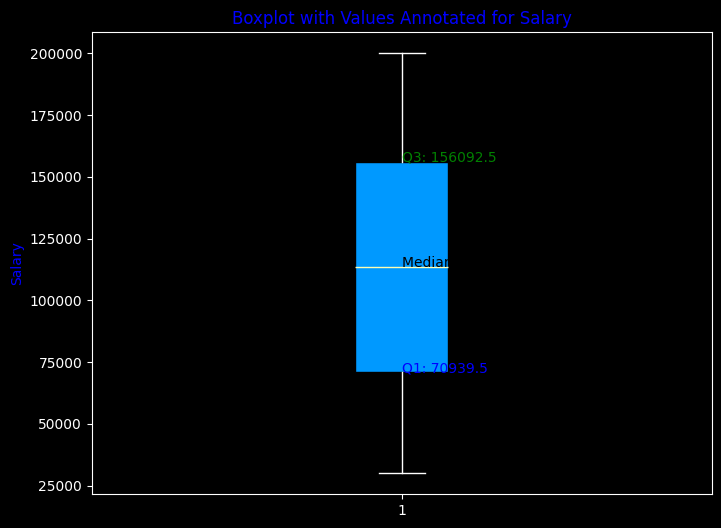

In [28]:
plt.figure(figsize=(8, 6))
box = plt.boxplot(df['salary_in_usd'], patch_artist=True, boxprops=dict(facecolor='#0099FF', color='black'))

# Değerleri yazdırma
median = np.median(df['salary_in_usd'])
q1 = np.percentile(df['salary_in_usd'], 25)
q3 = np.percentile(df['salary_in_usd'], 75)
iqr = q3 - q1

# Kutunun ortasına değerleri ekleme
plt.text(1, median, f'Median: {median}', horizontalalignment='left', color='black', fontsize=10)
plt.text(1, q1, f'Q1: {q1}', horizontalalignment='left', color='blue', fontsize=10)
plt.text(1, q3, f'Q3: {q3}', horizontalalignment='left', color='green', fontsize=10)

# Grafik başlığı ve etiketleri
plt.title('Boxplot with Values Annotated for Salary', color='blue')
plt.ylabel('Salary', color='blue')

plt.show()

<ipython-input-29-7075daeacdaf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_category', y='salary_in_usd', data=df, palette=custom_palette)
<ipython-input-29-7075daeacdaf>:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='job_category', y='salary_in_usd', data=df, palette=custom_palette)


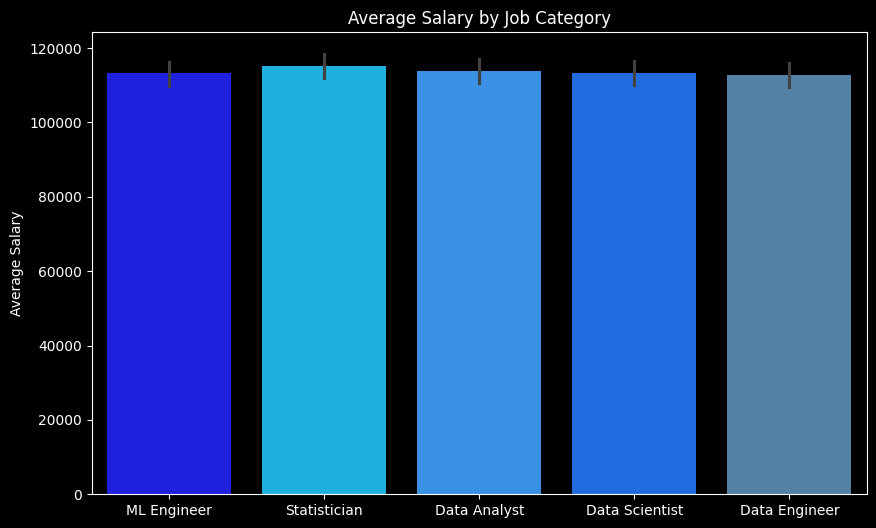

In [29]:
plt.figure(figsize=(10, 6))
custom_palette = ['#0000FF','#00BFFF', '#1E90FF','#0066FF','#4682B4',  '#4169E1', '#4B4BFF','#3232FF', '#0000CC', '#00008B' ]

sns.barplot(x='job_category', y='salary_in_usd', data=df, palette=custom_palette)
plt.title('Average Salary by Job Category')
plt.ylabel('Average Salary')
plt.xlabel('')
# plt.xticks(rotation=45, color='blue')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4455 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4455 non-null   int64 
 1   job_title           4455 non-null   object
 2   job_category        4455 non-null   object
 3   salary_currency     4455 non-null   object
 4   salary              4455 non-null   int64 
 5   salary_in_usd       4455 non-null   int64 
 6   employee_residence  4455 non-null   object
 7   experience_level    4455 non-null   object
 8   employment_type     4455 non-null   object
 9   work_setting        4455 non-null   object
 10  company_location    4455 non-null   object
 11  company_size        4455 non-null   object
dtypes: int64(3), object(9)
memory usage: 452.5+ KB


Label Encoding is a technique used in machine learning to convert categorical data (non-numeric data) into numeric form, so it can be processed by machine learning algorithms, which typically work only with numerical data.

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job_category'] = le.fit_transform(df['job_category'])
df['job_title'] = le.fit_transform(df['job_title'])
df['salary_currency'] = le.fit_transform(df['salary_currency'])
df['employee_residence'] = le.fit_transform(df['employee_residence'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['experience_level'] = le.fit_transform(df['experience_level'])
df['work_setting'] = le.fit_transform(df['work_setting'])

In [32]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,11,3,0,186597,136086,6,2,0,2,1,0
1,2020,13,4,3,110630,67982,3,1,1,2,2,1
2,2022,9,3,2,61280,153309,5,2,0,0,0,0
3,2022,2,0,3,154130,135242,1,3,2,0,4,0
4,2020,12,4,0,172312,35156,5,2,2,1,5,2


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,4455.0,2020.982043,0.821873,2020.0,2020.0,2021.0,2022.0,2022.0
job_title,4455.0,6.921437,4.302611,0.0,3.0,7.0,11.0,14.0
job_category,4455.0,1.971044,1.413361,0.0,1.0,2.0,3.0,4.0
salary_currency,4455.0,1.970819,1.421830,0.0,1.0,2.0,3.0,4.0
salary,4455.0,112900.680135,48439.041227,30018.0,70888.0,113605.0,154114.0,197570.0
salary_in_usd,4455.0,113653.784287,49122.978662,30016.0,70939.5,113481.0,156092.5,199985.0
employee_residence,4455.0,3.000000,1.980711,0.0,1.0,3.0,5.0,6.0
experience_level,4455.0,1.512233,1.121601,0.0,1.0,2.0,3.0,3.0
employment_type,4455.0,1.507744,1.116022,0.0,1.0,2.0,3.0,3.0
work_setting,4455.0,0.979125,0.817558,0.0,0.0,1.0,2.0,2.0


In [34]:
x = df.drop(['salary_in_usd','salary','salary_currency'], axis=1)
y = df['salary_in_usd']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [37]:
diff = y_test - y_pred

In [38]:
diff

,salary_in_usd
4145,2549.486290
4326,61806.005192
146,34083.397833
3552,82804.494750
697,-11526.301203
...,...
2524,-39729.681860
1057,-82937.875810
2428,-43504.780277
576,-15311.851662


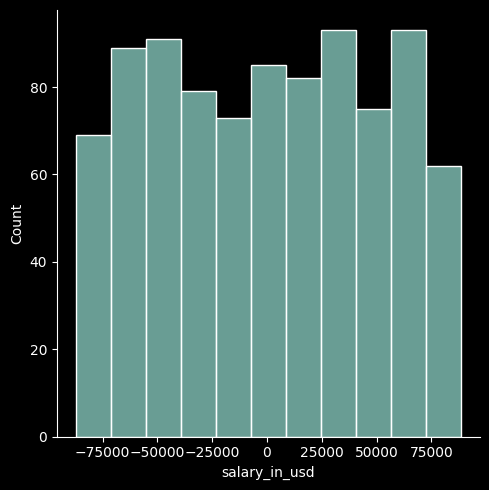

In [39]:
import seaborn as sns
sns.displot(diff)

In [41]:
import pickle
pickle.dump(lr, open('model.sav', 'wb'))